In [52]:
import numpy
from matplotlib import pyplot
from matplotlib.lines import Line2D
import os

pyplot.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [2]:
output_dir = "paper_plots"

os.makedirs(output_dir, exist_ok=True)

# States with Macroscopy particle imbalance

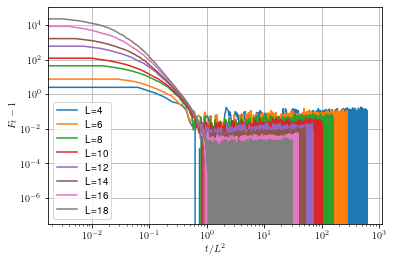

In [8]:
arr = numpy.load(os.path.join("half_filling", "all_defects_left.npz"))
half_filling_left_purities = arr['data']
half_filling_left_ls = arr['ls']

for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l**2), purity - 1, label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.show()

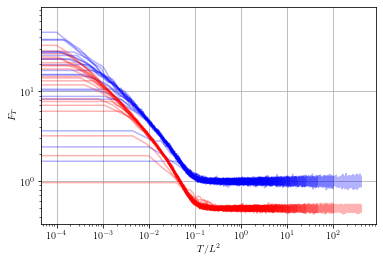

In [9]:
arr = numpy.load(os.path.join("merge_single_double_filling", f'dimer_and_dephased.npz'))
dimer_ls = arr['ls']
dimer_all_purities = arr['data']
dimer_all_mixed_purities = arr['data_mixed']

for l,pur in zip(dimer_ls, dimer_all_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur, c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur, c='red', alpha=0.3)

pyplot.grid()
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F_T$')
pyplot.xlabel('$T/L^2$')
pyplot.show()

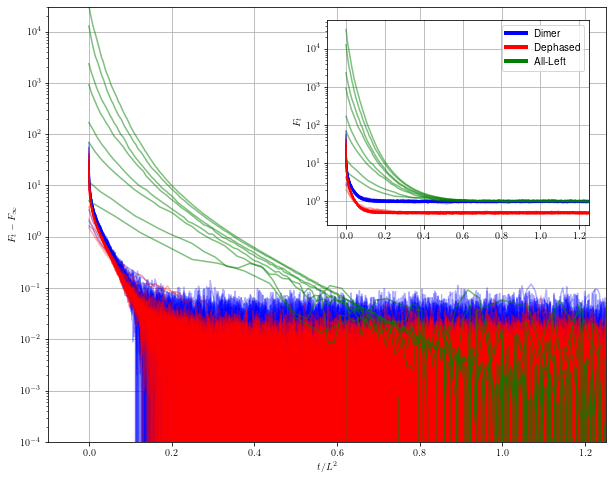

In [58]:
fig, ax = pyplot.subplots(figsize=[10, 8])

for l,pur in zip(dimer_ls, dimer_all_purities):
    ax.plot(numpy.arange(len(pur))/l**2, pur - 1.0, c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    ax.plot(numpy.arange(len(pur))/l**2, pur - 0.5, c='red', alpha=0.3)

for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
    ax.plot(numpy.arange(len(purity)) / (l**2), purity - 1.0, c='green', alpha=0.5)

ax.set_ylim([1e-4,3e4])
ax.set_xlim([-0.1,1.25])
ax.set_xlabel(r'$t/L^2$')
ax.set_ylabel(r'$F_t - F_\infty$')
ax.set_yscale('log')
# pyplot.xscale('log')
ax.grid()

axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
for l,pur in zip(dimer_ls, dimer_all_purities):
    axins.plot(numpy.arange(len(pur))/l**2, pur, c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    axins.plot(numpy.arange(len(pur))/l**2, pur, c='red', alpha=0.3)

for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
    axins.plot(numpy.arange(len(purity)) / (l**2), purity, c='green', alpha=0.5)

axins.set_yscale('log')
axins.set_xlim([-0.1,1.25])
axins.set_ylabel(r'$F_t$')
axins.grid()
    
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='green', lw=4)]
axins.legend(custom_lines, ['Dimer', 'Dephased', 'All-Left'])
    
pyplot.savefig(os.path.join(output_dir, 'fig_2.pdf'))
pyplot.show()

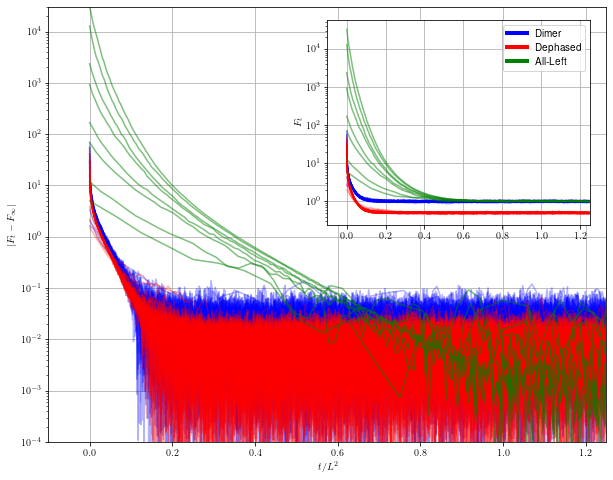

In [59]:
fig, ax = pyplot.subplots(figsize=[10, 8])

for l,pur in zip(dimer_ls, dimer_all_purities):
    ax.plot(numpy.arange(len(pur))/l**2, numpy.abs(pur - 1.0), c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    ax.plot(numpy.arange(len(pur))/l**2, numpy.abs(pur - 0.5), c='red', alpha=0.3)

for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
    ax.plot(numpy.arange(len(purity)) / (l**2), numpy.abs(purity - 1.0), c='green', alpha=0.5)

ax.set_ylim([1e-4,3e4])
ax.set_xlim([-0.1,1.25])
ax.set_xlabel(r'$t/L^2$')
ax.set_ylabel(r'$\vert F_t - F_\infty \vert$')
ax.set_yscale('log')
# pyplot.xscale('log')
ax.grid()

axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
for l,pur in zip(dimer_ls, dimer_all_purities):
    axins.plot(numpy.arange(len(pur))/l**2, pur, c='blue', alpha=0.3)
for l,pur in zip(dimer_ls, dimer_all_mixed_purities):
    axins.plot(numpy.arange(len(pur))/l**2, pur, c='red', alpha=0.3)

for l, purity in zip(half_filling_left_ls, half_filling_left_purities):
    axins.plot(numpy.arange(len(purity)) / (l**2), purity, c='green', alpha=0.5)

axins.set_yscale('log')
axins.set_xlim([-0.1,1.25])
axins.set_ylabel(r'$F_t$')
axins.grid()
    

custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='green', lw=4)]
axins.legend(custom_lines, ['Dimer', 'Dephased', 'All-Left'])
    
pyplot.savefig(os.path.join(output_dir, 'fig_2_abs.pdf'))
pyplot.show()